In [4]:
f_func <- "./functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))

f_data_loading <- "./data_loading.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_data_loading, '--to=script', '--stdout'), stdout = TRUE)))

In [8]:
Afum_endX %>% head()

sample_id,origin,EndX,sample_type,sample,type,read,sCount,nsCount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
A01Basp,IPA samples,A,ssLP BAL,BAL,ssLP,R1,389,24.77707
A01Basp,IPA samples,A,ssLP BAL,BAL,ssLP,R2,369,23.50318
A01Basp,IPA samples,C,ssLP BAL,BAL,ssLP,R1,464,29.55414
A01Basp,IPA samples,C,ssLP BAL,BAL,ssLP,R2,312,19.87261
A01Basp,IPA samples,G,ssLP BAL,BAL,ssLP,R1,460,29.29936
A01Basp,IPA samples,G,ssLP BAL,BAL,ssLP,R2,614,39.10828


In [21]:
 Afum_endX %>% 
        filter(sample == sel_sample)  %>% 
        filter(sample_id %in% c(above40_samples$sample_id)) %>% dim()

[1] 32  9

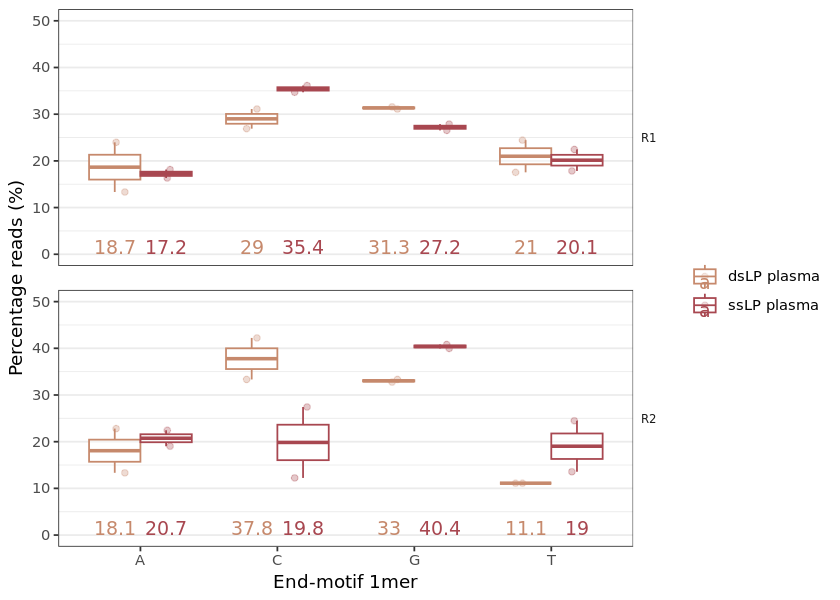

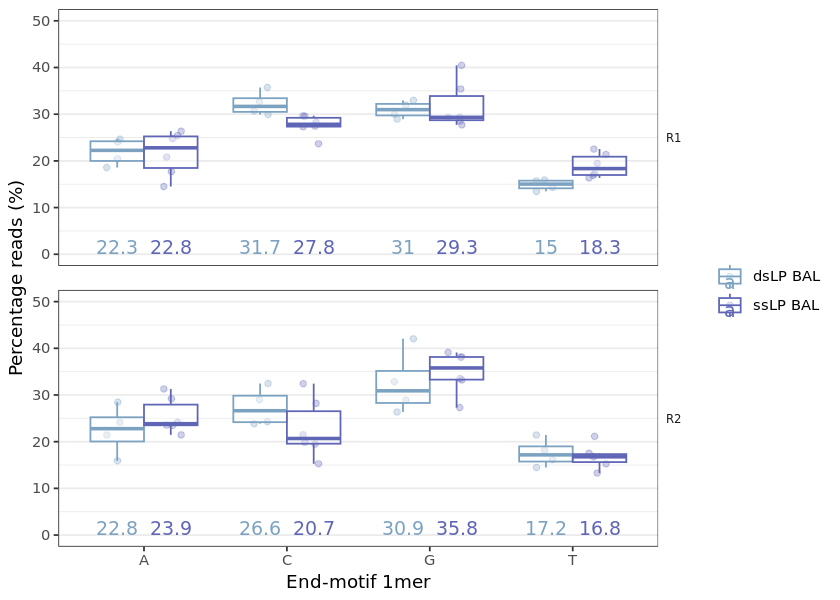

In [23]:
options(repr.plot.width=7, repr.plot.height=5)
for (sel_sample in c("plasma", "BAL")){
    
    above40_samples <- Afum_endX %>% 
        group_by(sample_id, read, sample_type, sample, type) %>%  
        summarise(sumCount = sum(sCount), .groups = 'drop') %>% 
        filter(sample == sel_sample) %>% 
        filter(sumCount >= 40) 
    
    Afum_motif_all <- Afum_endX %>% 
        filter(sample == sel_sample)  %>% 
        filter(sample_id %in% c(above40_samples$sample_id)) %>% 
        ggplot(aes(x = EndX, y = nsCount, color = sample_type)) + 
            geom_jitter(alpha = 0.3, position = position_jitterdodge(jitter.width = 0.15)) +  # Added alpha for transparency
            geom_boxplot(alpha = 0.4, outlier.shape = NA, position = position_dodge(width = 0.75)) +  # Position dodge for alignment
            facet_grid(rows = vars(read)) + 
            theme_bw() + ylim(0,50) + 
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                         "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) +
            geom_text(
                data = . %>% group_by(sample_type, EndX, read) %>% summarise(median_nsCount = median(nsCount, na.rm = TRUE),
                       sd_nsCount = sd(nsCount, na.rm = TRUE), .groups = 'drop'),
                aes(x = EndX, y = 0, label = paste0(round(median_nsCount, 1))),
                position = position_dodge(width = 0.75), size = 4, vjust = 0 ) + 
            labs(x = "End-motif 1mer", y = "Percentage reads (%)", color = "") + 
            theme(strip.background = element_rect(color = "white", fill = "white"), 
                panel.grid.major.x = element_blank(),
                panel.grid.minor.x = element_blank(),
                strip.text.x = element_text(size = 7), 
                panel.spacing = unit(1, "lines"), 
                strip.text.y = element_text(angle = 0, size = 7, hjust = 0))   
    Afum_motif_all %>% print()

    ggsave(paste0("../../output_figures/Afumigatus_", sel_sample,"_motif_endX_all.png"), plot = Afum_motif_all, 
               width = 7, height = 5)
    ggsave(paste0("../../output_figures/Afumigatus_", sel_sample,"_motif_endX_all.pdf"), plot = Afum_motif_all, 
               width = 7, height = 5)
}

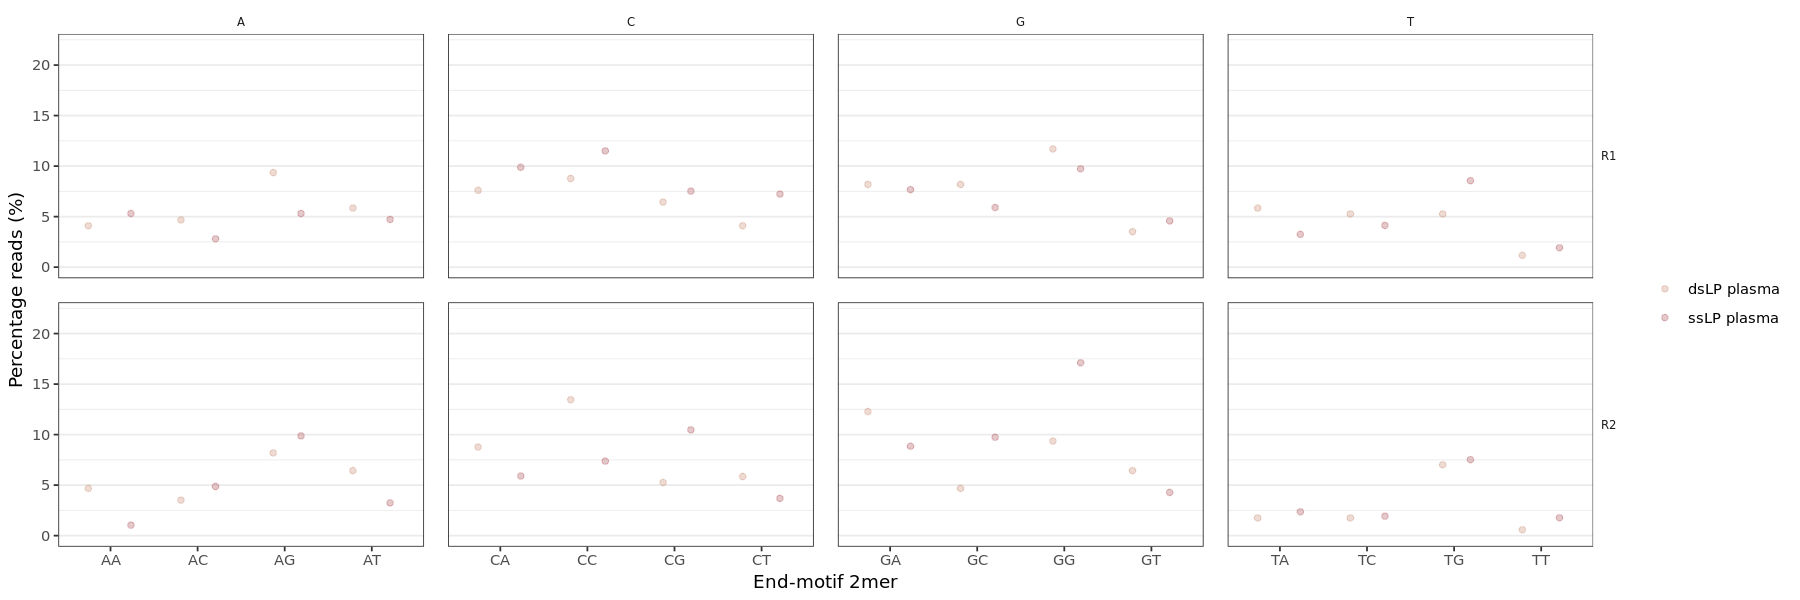

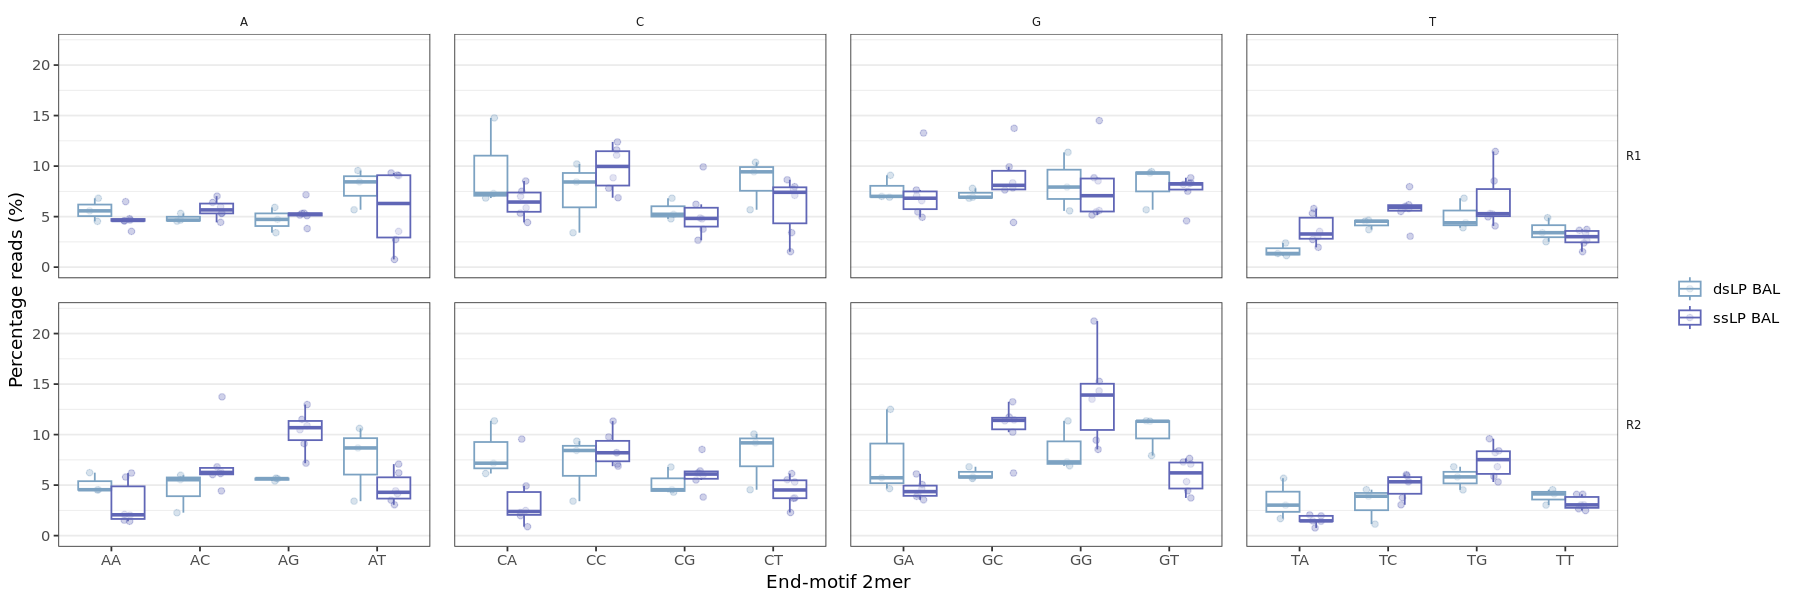

In [36]:
options(repr.plot.width=15, repr.plot.height=5)
for (sel_sample in c("plasma", "BAL")){
    
    above80_samples <- Afum_endX %>% 
        group_by(sample_id, read, sample_type, sample, type) %>%  
        summarise(sumCount = sum(sCount), .groups = 'drop') %>% 
        filter(sample == sel_sample) %>% 
        filter(sumCount >= 80) 
    
    Afum_motif_all <- Afum_endXX %>% 
        filter(sample == sel_sample)  %>% 
        filter(sample_id %in% c(above80_samples$sample_id)) %>% 
        ggplot(aes(x = EndXX, y = nsCount, color = sample_type)) + 
            geom_jitter(alpha = 0.3, position = position_jitterdodge(jitter.width = 0.15)) +  # Added alpha for transparency
            facet_grid(rows = vars(read), cols = vars(EndX), scales="free", space="free_x") + 
            theme_bw() + ylim(0,22) +
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                         "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) +
            labs(x = "End-motif 2mer", y = "Percentage reads (%)", color = "") + 
            theme(strip.background = element_rect(color = "white", fill = "white"), 
                panel.grid.major.x = element_blank(),
                panel.grid.minor.x = element_blank(),
                strip.text.x = element_text(size = 7), 
                panel.spacing = unit(1, "lines"), 
                strip.text.y = element_text(angle = 0, size = 7, hjust = 0))   
    
    if (sel_sample == "BAL"){
        Afum_motif_all <- Afum_motif_all + 
            geom_boxplot(alpha = 0.4, outlier.shape = NA, position = position_dodge(width = 0.75))  
    }
    Afum_motif_all %>% print()
    
    ggsave(paste0("../../output_figures/Afumigatus_", sel_sample,"_motif_endXX_all.png"), plot = Afum_motif_all, 
               width = 15, height = 5)
    ggsave(paste0("../../output_figures/Afumigatus_", sel_sample,"_motif_endXX_all.pdf"), plot = Afum_motif_all, 
               width = 15, height = 5)
}